<a href="https://colab.research.google.com/github/saketh1999/ML_ForrestFire-Algeria/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('ForrestFire/Algerian_forest_fires_dataset_CLEANED.csv',)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
#drop month,day,year
df.drop(['day','month','year'],axis=1,inplace=True)


In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
## Feature Encoding
df['Classes'] = df['Classes'].astype(str)
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

In [ ]:
##Independent and Dependent Features
X = df.drop('FWI',axis=1) # All features except FWI
y = df['FWI'] #Dependent feature



In [ ]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(np.shape(X_train))

(181, 11)


In [ ]:
print(np.shape(X_test))

(61, 11)


In [ ]:
## Feature Selection based on Correlation
X_train.corr()

#Negatively correlation is fine
#Highly positively correlated data must be removed

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.525551,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.435094,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.059470,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.386323,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.780805,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.613507,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.546427,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.749722,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.609708,0.096607
Classes,0.525551,-0.435094,-0.059470,-0.386323,0.780805,0.613507,0.546427,0.749722,0.609708,1.000000,0.161852


<Axes: >

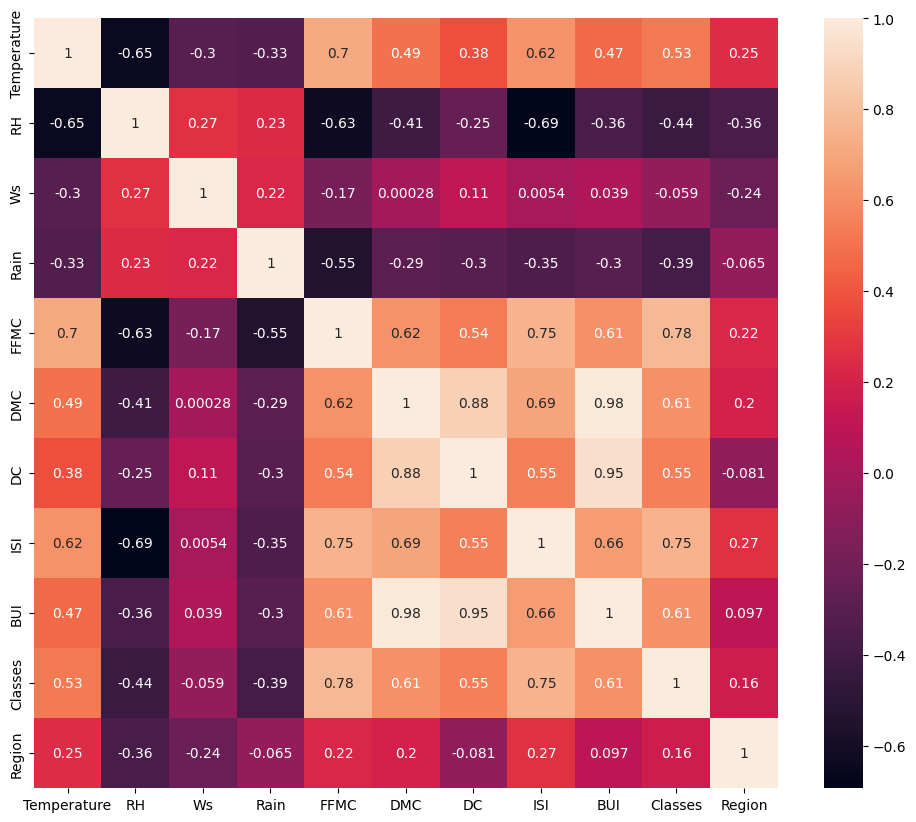

In [ ]:
## Check for Multiocollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [ ]:
def correlation(dataset, threshold):
  col_corr= set()
  corr_matrix = dataset. corr ()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix. columns [i]
        col_corr.add(colname)
  return col_corr

In [ ]:
##Threshold -- Setup by Domain Expert
corr_features = correlation(X_train,0.85)

In [ ]:
##Drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
print(np.shape(X_train))
print(np.shape(X_test))

(181, 9)
(61, 9)


In [ ]:
##Feature Scaling or Standadization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled

array([[-0.82836812,  0.75305576,  1.27406033, ..., -0.60658617,
        -1.07459849, -0.98356052],
       [-0.02800533, -0.52331623, -0.52192814, ...,  0.08124507,
         0.93058013,  1.01671425],
       [-0.82836812, -1.46380085, -2.67711431, ..., -0.46427625,
         0.93058013,  1.01671425],
       ...,
       [-1.89551851,  0.88741071,  0.55566494, ..., -1.05723422,
        -1.07459849, -0.98356052],
       [ 1.03914506, -0.45613875,  0.19646725, ...,  0.84023126,
         0.93058013,  1.01671425],
       [-0.56158052,  0.95458818,  1.99245572, ..., -0.84376935,
        -1.07459849, -0.98356052]])

# Box Plots to Understand Effects of Standard Scaler

<ipython-input-64-4aae9c35cd40>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2,1)


Text(0.5, 1.0, 'X_train After Scaling')

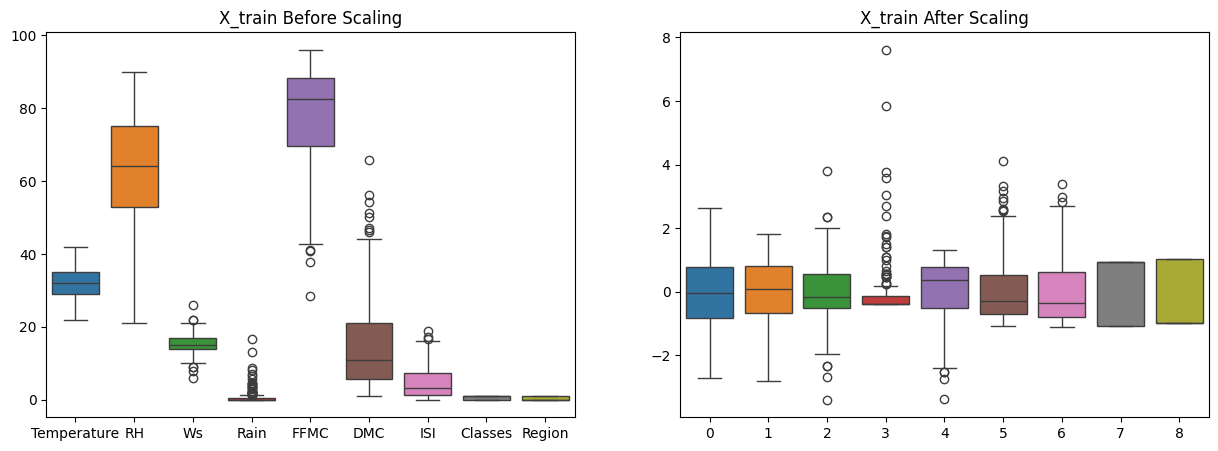

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2,1)
sns.boxplot (data=X_train)
plt. title( 'X_train Before Scaling')
plt. subplot (1, 2, 2)
sns. boxplot (data=X_train_scaled)
plt. title('X_train After Scaling')

Mean Absolute error 0.8512142101975181
R2 Score 0.9755741549678952


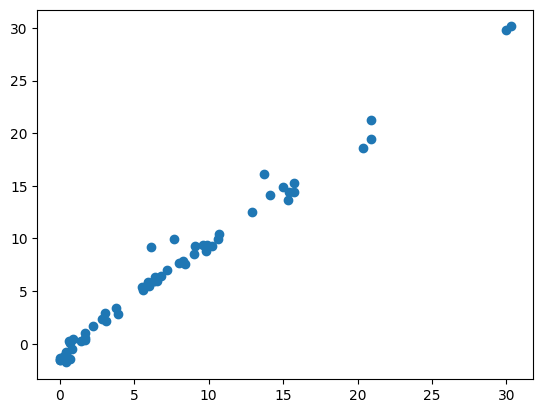

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Absolute error 0.9844679399280253
R2 Score 0.9576617587983329


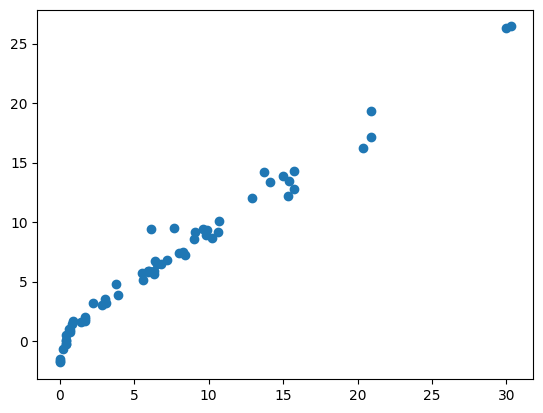

In [ ]:
##Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

# **Cross Validation Lasso**

In [ ]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [ ]:
lassocv.alphas_

array([6.94947533e+00, 6.48110395e+00, 6.04429924e+00, 5.63693370e+00,
       5.25702323e+00, 4.90271746e+00, 4.57229071e+00, 4.26413362e+00,
       3.97674529e+00, 3.70872596e+00, 3.45877025e+00, 3.22566071e+00,
       3.00826197e+00, 2.80551518e+00, 2.61643285e+00, 2.44009403e+00,
       2.27563986e+00, 2.12226935e+00, 1.97923550e+00, 1.84584165e+00,
       1.72143810e+00, 1.60541894e+00, 1.49721907e+00, 1.39631152e+00,
       1.30220480e+00, 1.21444055e+00, 1.13259132e+00, 1.05625846e+00,
       9.85070173e-01, 9.18679740e-01, 8.56763800e-01, 7.99020787e-01,
       7.45169461e-01, 6.94947533e-01, 6.48110395e-01, 6.04429924e-01,
       5.63693370e-01, 5.25702323e-01, 4.90271746e-01, 4.57229071e-01,
       4.26413362e-01, 3.97674529e-01, 3.70872596e-01, 3.45877025e-01,
       3.22566071e-01, 3.00826197e-01, 2.80551518e-01, 2.61643285e-01,
       2.44009403e-01, 2.27563986e-01, 2.12226935e-01, 1.97923550e-01,
       1.84584165e-01, 1.72143810e-01, 1.60541894e-01, 1.49721907e-01,
      

Mean Absolute error 0.851029376501632
R2 Score 0.9753222396484302


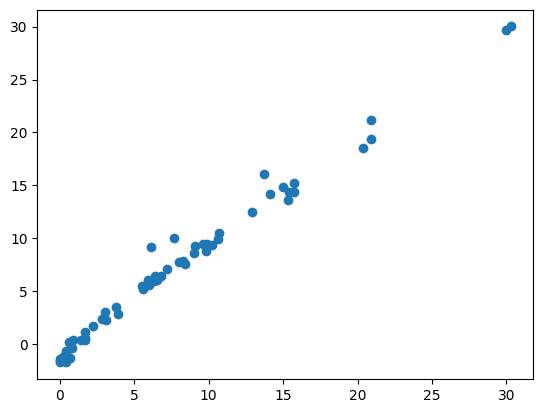

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean Absolute error 1.6026259003953327
R2 Score 0.8861588958374857


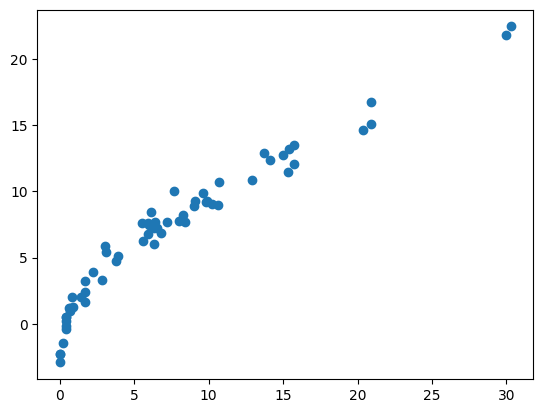

In [ ]:
##Elastic net Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute error",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)